# PROJECT: INVESTIGATE A DATASET, TMDB MOVIE DATA
This data set contains information about 10,000 movies collected from The Movie Database (TMDb). The data contains the following columns:

__id__ column, __imdb_id__ column, the __popularity__ column which describes how popular the movie is, the __budget__ column which describes how much it costs to fully produce the film, the __revenue__ column which describes the amount of money the film made, the __original_title__ which states the film title, __cast__ column which lists the films actors separated by a pipe(|), the __homepage__ column which holds a direct link to the film, __director__ column which names the director of the film, __tagline__ which carries the catchphrase of the film, __keywords__ which hold the words most commonly used to describe the movie separated by a pipe(|), __overview__ column which describes the plot of the film briefly, the __runtime__ column which describes how long the film is in minutes, __genres__ column which describes all the genres a film falls into separated by a pipe (|), __production_companies__ which holds all the production companies involved in producing the film separated by a pipe (|), the __release_date__ which details the exact date a film was released,the __vote_count__ which describes the number of user rating votes, __vote_average__ column which describes the average rating of a film, __release_year__ which describes the year a film was released, __budget_adj__ which describes the budget adjusted for inflation, and __revenue_adj__ which describes the revenue adjusted for inflation.

Examining this dataset, i will be looking to answer the following specific questions:
    
    1. What year raked in the highest revenue for a movie? And what movie was it?
    2. What year raked in the lowest revenue for a movie?And what movie was it?
    3. Does the budget have a direct influence on the revenue, is there any correlation?
       Does the budget have a direct influence on the popularity, is there any correlation?
       Does the budget have a direct influence on the vote_avergae, is there any correlation?
       Is revenue linked with popularity?
       Is revenue linked with vote_average?
    4. What year was the most amount of movies released and what year was the least amount of movies released?
    5. Which years made the most and the least average profit??
    6. What runtime of movies is most popular amongst fans?
    7. Which genre is the most released?

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read csv file for tmdb movie data
df = pd.read_csv('tmdb-movies.csv')

# INSPECT THE DATA FOR DISCREPANCIES

In [2]:
#inspect the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#check for null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#check for duplicate values
df.duplicated().sum()

1

# CLEANING DATA

In [6]:
#Drop columns that are not significant to analysis
df.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count'], axis=1, inplace=True)

In [7]:
#check for null values
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

In [8]:
#drop genres rows with null values and duplicate rows
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
#fix zero values in runtime, budget and revenue columns as found out in the df.describe() above
df['runtime'] = df['runtime'].replace(0, np.NaN)
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

In [10]:
#check if zero values have been replaced
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,10767.000000,10767.000000,5.157000e+03,4.844000e+03,10737.000000,10767.000000,10767.000000
mean,65477.144144,0.650924,3.080677e+07,8.932364e+07,102.699544,5.967549,2001.283459
std,91703.303390,1.003565,3.892456e+07,1.621417e+08,30.470645,0.931426,12.815909
min,5.000000,0.000065,1.000000e+00,2.000000e+00,3.000000,1.500000,1960.000000
25%,10559.500000,0.209957,6.000000e+06,7.784130e+06,90.000000,5.400000,1995.000000
50%,20423.000000,0.386062,1.708000e+07,3.190530e+07,99.000000,6.000000,2006.000000
75%,74507.500000,0.719253,4.000000e+07,1.000000e+08,112.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [11]:
#count null values
df.isnull().sum()

id                   0
popularity           0
budget            5610
revenue           5923
original_title       0
cast                 0
runtime             30
genres               0
vote_average         0
release_year         0
dtype: int64

# GETTING A GENERAL VIEW OF THE DATA AFTER CLEANING
Using histograms to view relevant columns

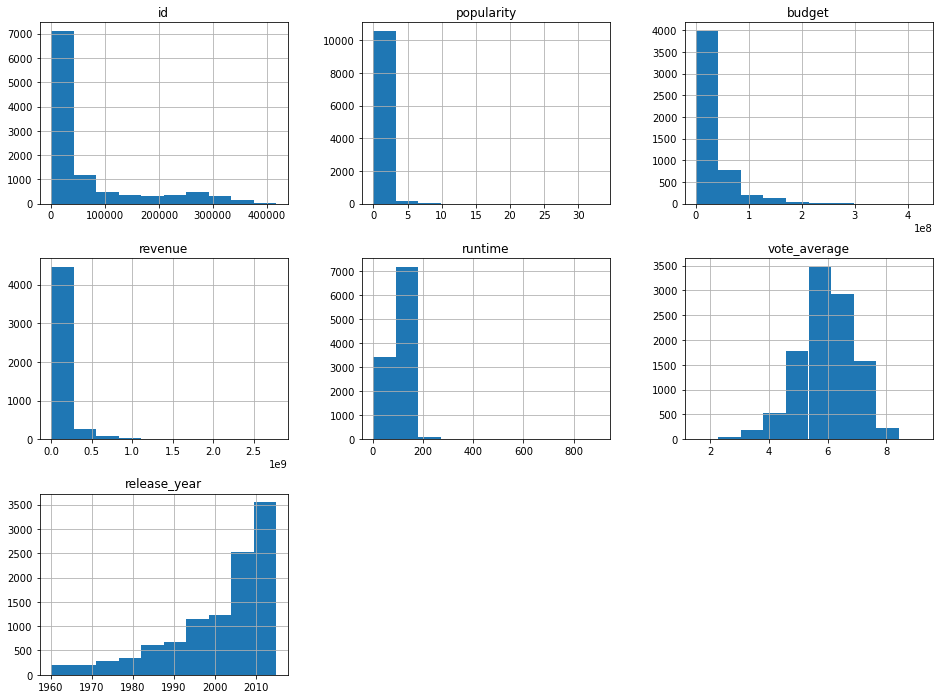

In [12]:
df.hist(figsize =(16,12));

From the histograms above, it is important to note the following:
    
    1. Most of the popularity ratings fall between 1 and 3, a right skewed distribution
    2. Most of the budget for movies fall between 0*1e8 and 2*1e8, a right skewed distribution
    3. Most of the revenue for movies fall between 0*1e9 and 0.5*1e9, a right skewed distribution
    4. Most of the movies runtime fall between 100 and 200 minutes, a right skewed distribution
    5. Vote_average for movies have the mode between 5 and 6, a left skewed distribution
    6. There has been a steady increase in the number of movies released per year from 1960 to 2015, it is a left skewed
       distribution

# EXPLORING THE DATA
### RESEARCH QUESTION 1
What year raked in the highest revenue for a movie?
And what movie was it?

2781505847.0


1386    Avatar
Name: original_title, dtype: object

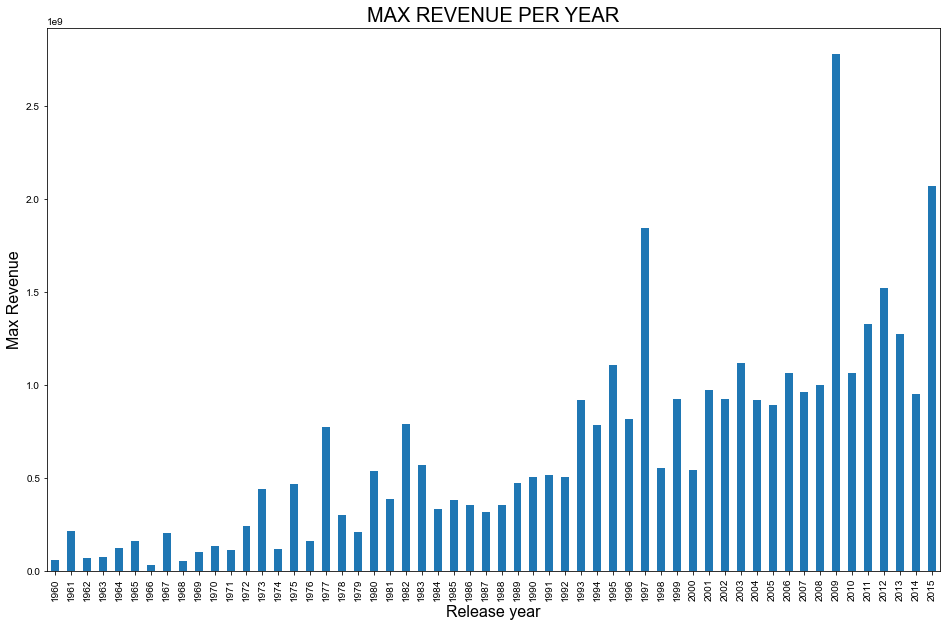

In [13]:
#group max revenue per year and plot it
df.groupby('release_year')['revenue'].max().plot(kind = 'bar', figsize = (16,10))
#assign plot title and labels
plt.title('MAX REVENUE PER YEAR', fontsize = '20')
plt.xlabel('Release year', fontsize = '16')
plt.ylabel('Max Revenue', fontsize = '16')
sns.set_style('whitegrid')

#2009 is the year with the highest revenue, now we can answer the question 'what movie is the highest grossing of all time'
df_2009 = df.query('release_year == 2009')
print(df_2009['revenue'].max())
df_2009.query('revenue == 2781505847.0')['original_title']

                2009 raked in the highest revenue out of all the years and 'AVATAR' was the movie with the highest revenue

### RESEARCH QUESTION 2
What year raked in the lowest revenue for a movie?
And what movie was it?

2.0
5067    2003
8142    1995
Name: release_year, dtype: int64
5067    Shattered Glass
8142           Mallrats
Name: original_title, dtype: object


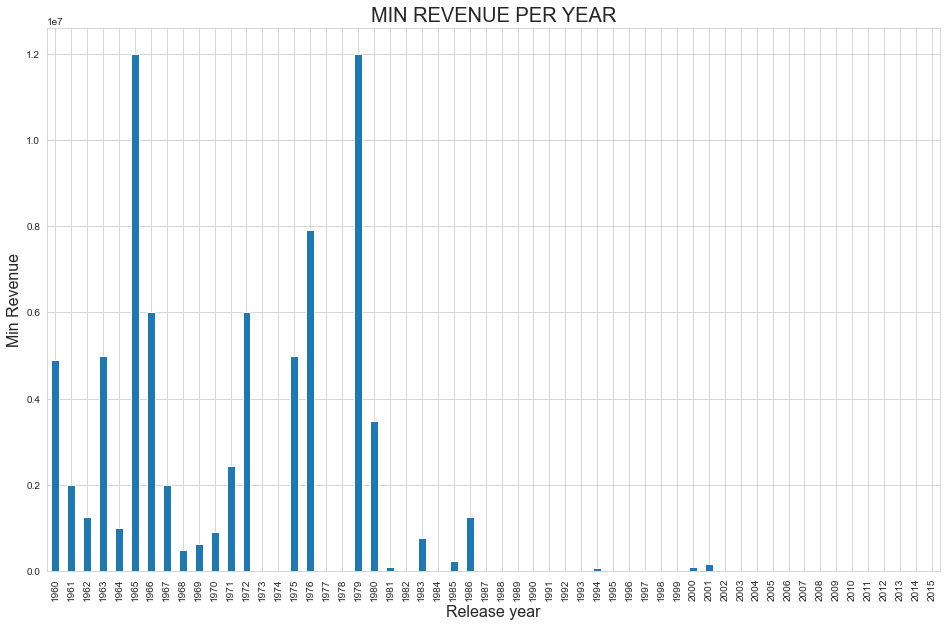

In [14]:
#group min revenue by release year and plot
df.groupby('release_year')['revenue'].min().plot(kind = 'bar', figsize = (16,10))

#assign plot title and label
plt.title('MIN REVENUE PER YEAR', fontsize = '20')
plt.xlabel('Release year', fontsize = '16')
plt.ylabel('Min Revenue', fontsize = '16')
sns.set_style = ('white_grid');

#2009 is the year with the highest revenue, now we can answer the question 'what movie is the highest grossing of all time'
df_min = df['revenue'].min()
print(df_min)
print(df.query('revenue == 2.0')['release_year'])
print(df.query('revenue == 2.0')['original_title'])

                1995 and 2003 raked in the lowest revenue recorded amongst all the years with the movies 'Mallrats' and 'Shattered Glass' respectively

### RESEARCH QUESTION 3
Does the budget have a direct influence on the revenue, is there any correlation?

Does the budget have a direct influence on the popularity, is there any correlation?

Does the budget have a direct influence on the vote_avergae, is there any correlation?

Is revenue linked with popularity?

Is revenue linked with vote_average?

Correlation between budget and revenue :  0.6884330032018239
Correlation between budget and popularity :  0.47943493114974617
Correlation between budget and vote_average :  0.09254748146413824
Correlation between revenue and popularity :  0.6291891400155029
Correlation between revenue and vote_average :  0.20719192214307686


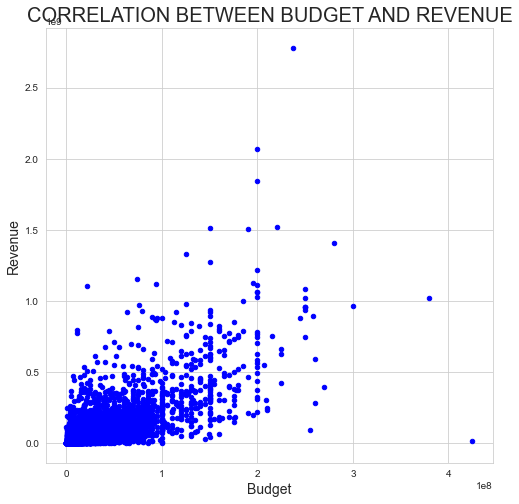

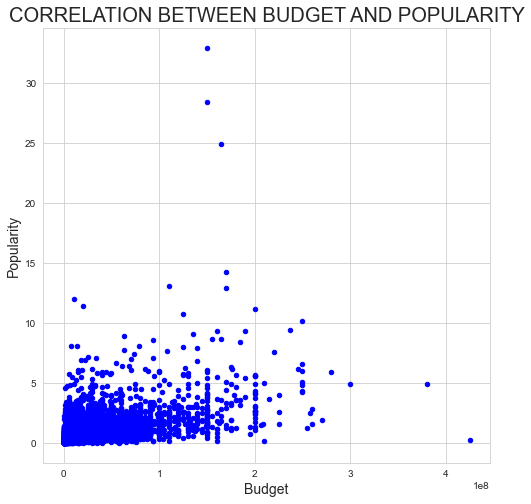

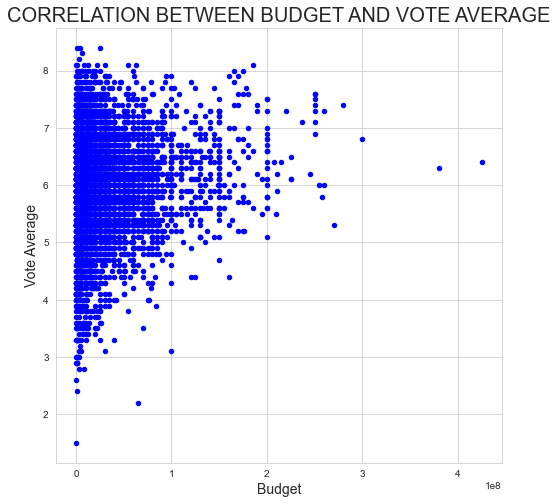

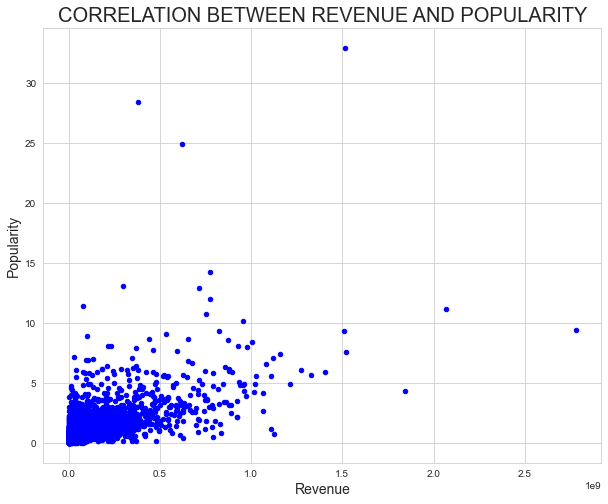

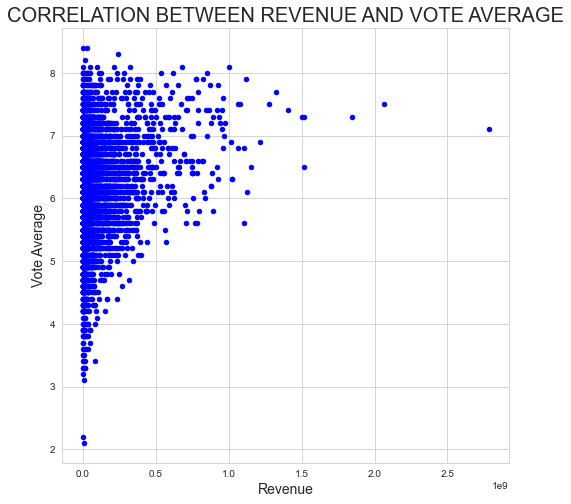

In [15]:
#scatter plot to find the correlation between budget and revenue
df.plot(x = 'budget', y = 'revenue', kind = 'scatter', figsize = (8,8), color = 'b')
plt.title('CORRELATION BETWEEN BUDGET AND REVENUE', fontsize = 20)
plt.xlabel('Budget', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14);
sns.set_style = ('white_grid')
#print the correlation
print("Correlation between budget and revenue : ",df.corr().loc['budget','revenue'])

#scatter plot to find the correlation between budget and popularity
df.plot(x = 'budget', y = 'popularity', kind = 'scatter', figsize = (8,8), color = 'b')
plt.title('CORRELATION BETWEEN BUDGET AND POPULARITY', fontsize = 20)
plt.xlabel('Budget', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14);
sns.set_style = ('white_grid')
#print the correlation
print("Correlation between budget and popularity : ",df.corr().loc['budget','popularity'])

#scatter plot to find the correlation between budget and vote_average
df.plot(x = 'budget', y = 'vote_average', kind = 'scatter', figsize = (8,8), color = 'b')
plt.title('CORRELATION BETWEEN BUDGET AND VOTE AVERAGE', fontsize = 20)
plt.xlabel('Budget', fontsize = 14)
plt.ylabel('Vote Average', fontsize = 14);
sns.set_style = ('white_grid')
#print the correlation
print("Correlation between budget and vote_average : ",df.corr().loc['budget','vote_average'])

#scatter plot to find the correlation between revenue and popularity
df.plot(x = 'revenue', y = 'popularity', kind = 'scatter', figsize = (10,8), color = 'b')
plt.title('CORRELATION BETWEEN REVENUE AND POPULARITY', fontsize = 20)
plt.xlabel('Revenue', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14);
sns.set_style = ('white_grid')
#print the correlation
print("Correlation between revenue and popularity : ",df.corr().loc['revenue','popularity'])

#scatter plot to find the correlation between revenue and vote_average
df.plot(x = 'revenue', y = 'vote_average', kind = 'scatter', figsize = (8,8), color = 'b')
plt.title('CORRELATION BETWEEN REVENUE AND VOTE AVERAGE', fontsize = 20)
plt.xlabel('Revenue', fontsize = 14)
plt.ylabel('Vote Average', fontsize = 14);
sns.set_style = ('white_grid')
#print the correlation
print("Correlation between revenue and vote_average : ",df.corr().loc['revenue','vote_average'])

1. The correlation between budget and revenue is 0.688433 which implies a strong positive correlation suggesting that a movie with a higher budget will make more money in revenue.
2. The correlation between budget and popularity is 0.479434 which implies a moderate positive correlation suggesting that a movie with a higher budget wil be more popular.
3. The correlation between budget and vote_average is 0.092547 which implies a very weak positive correlation suggesting that the budget has little or no effect on the vote_average
4. The correlation between revenue and popularity is 0.629189 which implies a strong positive correlation suggesting that a movie with a higher revenue will have a higher popularity rating.
5. The correlation between revenue and vote_average is 0.207191 which implies a weak positive correlation suggesting that a movie with a higher revenue will have very little effect on the vote_average.

### RESEARCH QUESTION 4
What year was the most amount of movies released and what year was the least amount of movies released?

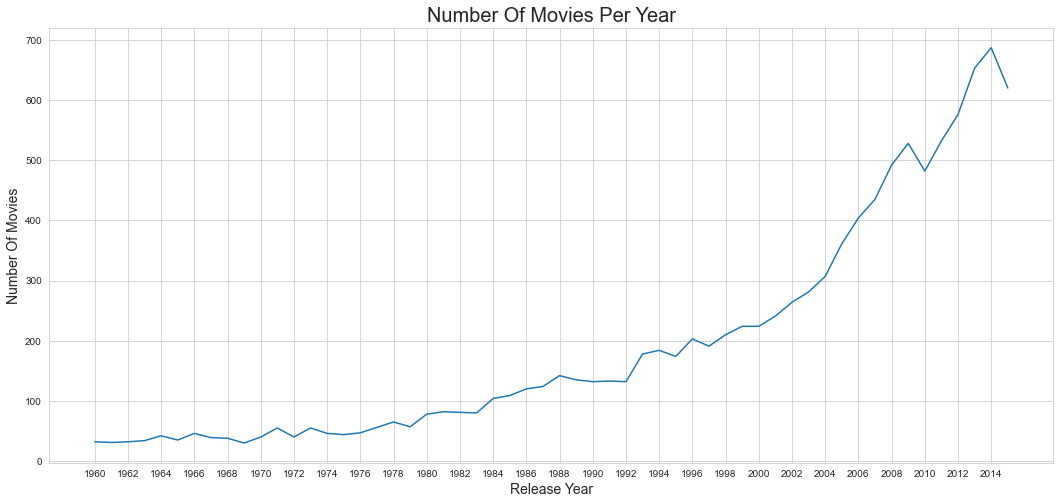

In [16]:
#group the id count by year
df.groupby('release_year')['id'].count().plot(xticks = np.arange(1960, 2016, 2), figsize = (18,8))

#plot the line chart
plt.title("Number Of Movies Per Year",fontsize = 20)
plt.xlabel('Release Year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)
sns.set_style = ('white_grid');

The most amount of movies was released in 2014 and the least amount of movies was released in 1969.

### RESEARCH QUESTION 5
Which years made the most and the least average profit??

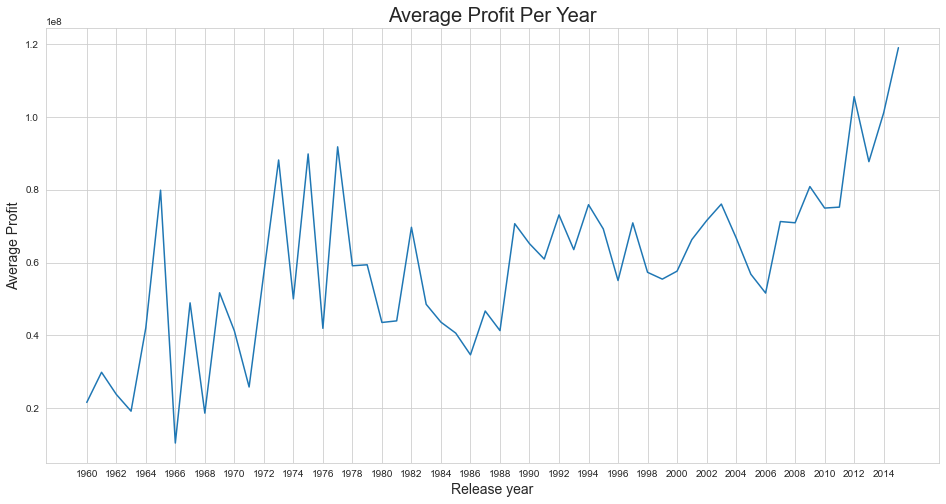

In [17]:
#Create a profit column
df['profit'] = df['revenue'] - df['budget']

df.groupby('release_year')['profit'].mean().plot(xticks = np.arange(1960, 2016, 2), figsize = (16, 8))

#setup the title and labels of the figure.
plt.title("Average Profit Per Year",fontsize = 20)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Average Profit',fontsize = 14)
sns.set_style = ('white_grid');

2015 made the most amount of profit and 1966 made the least amount of profit.

# RESEARCH QUESTION 6
What runtime of movies is most popular amongst fans?

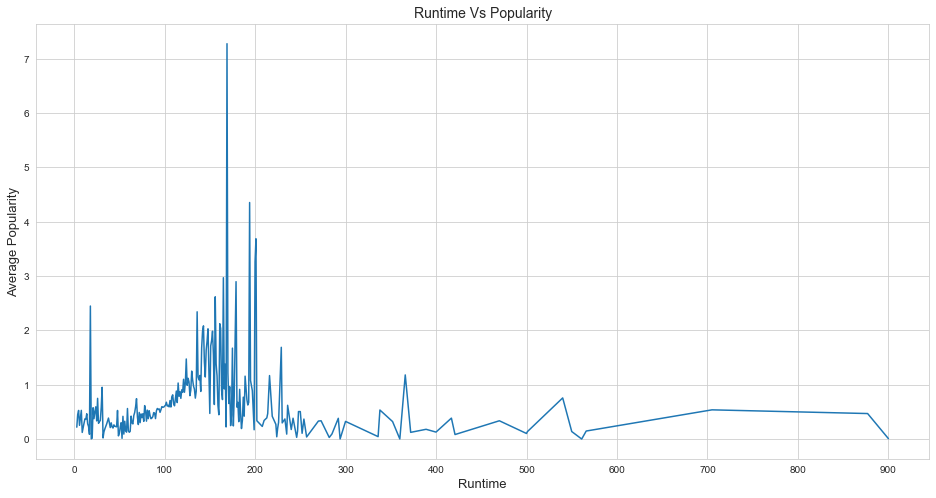

In [18]:
#make the group of the data according to their runtime and find the mean popularity related to this and plot.
df.groupby('runtime')['popularity'].mean().plot(figsize = (16,8),xticks=np.arange(0,1000,100))

#setup the plot details
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
sns.set_style = ('white_grid');

Movies with runtime between 100 and 200 minutes are the most popular among movie watchers.

### RESEARCH QUESTION 7 
Which genre is the most released?

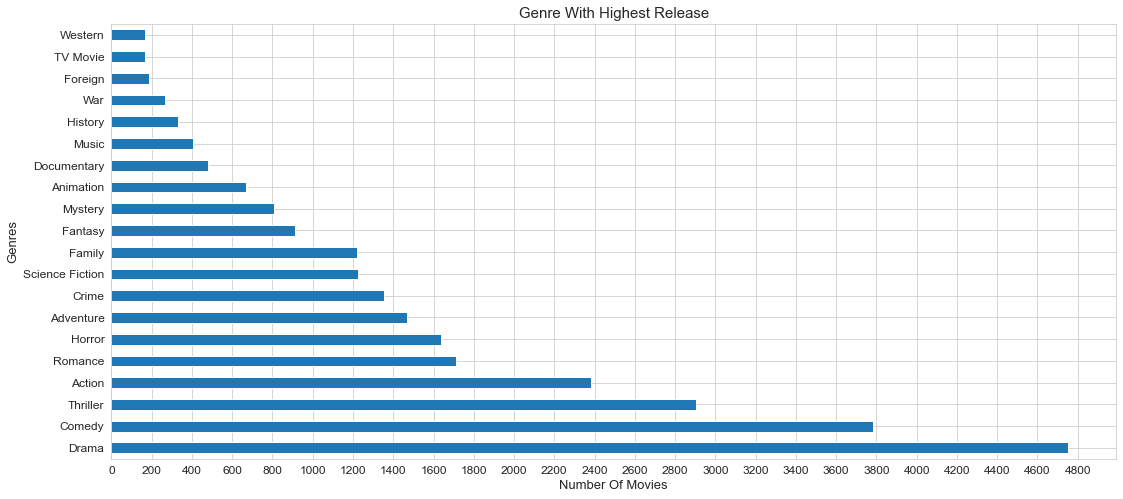

In [19]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #counts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (18,8), fontsize=12, xticks = np.arange(0,5000, 200))

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style = ('white_grid');

Drama has been the most released genre with close to 4800 drama movies in total.

### RESEARCH QUESTION 7
Who are the top 10 actors with most movie roles?

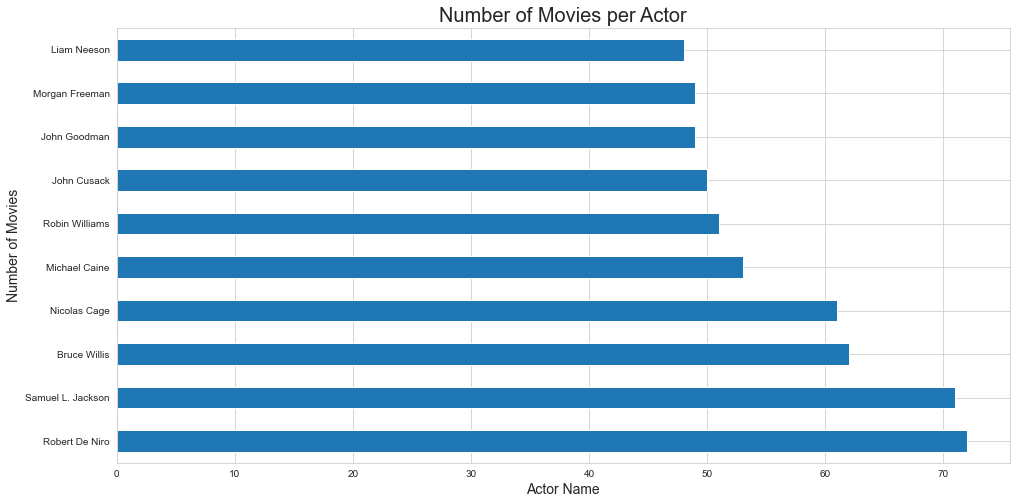

In [20]:
#call on the count_genre function created above to count for the cast column and plot for the top 10
count_genre('cast').iloc[:10].plot(kind = 'barh', figsize =(16,8))
#assign plot title and axis labels
plt.title('Number of Movies per Actor', fontsize = 20)
plt.xlabel('Actor Name', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)
sns.set_style = ('white_grid');

The chart above answers the question of the actors with the most appearances in movies between 1960 and 2015.

# CONCLUSION
1. Drama, Comedy, Thriller and Action are the four most-made genres.
2. Maximum number of movies released in a year was in year 2014.
3. 'Avatar' is the most profitable movie and also generated the most revenue.
4. Short or long duration movies are more popular than long duration movies.
5. Average runtime of the movies is decreasing year by year.
6. Revenue is directly connected to the budget. Movies with higher budgets have shown a corresponding increase in the revenues.
8. Popularity is directly connected to revenue. Movies with higher popularity have shown a corresponding increase in the revenues.

# LIMITATIONS
This is not a 100 percent guaranteed solution that this formula is gonna work, but the analysis shows that we have high probability of making high profits if we have similar characteristics as listed within the conclusion above:
    1. A runtime between 100 and 200 minutes,
    2. A movie which is Drama, Comedy, Thriller or Action,
    3. A movie with a high budget.
If we release a movie with these characteristics, it gives people high expectations from the movie. This is just one example of an influential factor that would likely lead to promising results, there are many that have to be taken care of.